In [2]:
import pandas as pd

In [3]:
df = pd.read_excel(r'datasets\combined_students_data.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28403 entries, 0 to 28402
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 28403 non-null  object 
 1   Age                                    28403 non-null  int64  
 2   City                                   28403 non-null  object 
 3   Academic Pressure                      28403 non-null  int64  
 4   CGPA                                   28403 non-null  float64
 5   Study Satisfaction                     28403 non-null  int64  
 6   Sleep Duration                         28403 non-null  float64
 7   Unnamed: 7                             28403 non-null  object 
 8   Degree                                 28403 non-null  object 
 9   Have you ever had suicidal thoughts ?  28403 non-null  int64  
 10  Work/Study Hours                       28403 non-null  int64  
 11  Fi

In [5]:
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Unnamed: 7,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,M,28,Varanasi,2,6.51,4,7.5,1,BA,1,9,2,1,0
1,M,28,Bangalore,4,7.48,5,5.5,2,MD,1,7,1,1,0
2,M,25,Rajkot,1,7.21,3,5.5,0,MBBS,1,10,4,0,1
3,M,23,Mumbai,1,9.90,4,9.0,0,MSc,1,7,2,1,0
4,F,31,Vadodara,1,5.97,5,9.0,2,LLM,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28398,F,27,Surat,5,5.75,5,5.5,0,'Class 12',1,7,1,1,0
28399,M,27,Ludhiana,2,9.40,3,4.5,2,MSc,0,0,3,1,0
28400,M,31,Faridabad,3,6.61,4,5.5,0,MD,0,12,2,0,0
28401,F,18,Ludhiana,5,6.88,2,4.5,2,'Class 12',1,10,5,0,1


In [6]:
df.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
count,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000,28403.000000
mean,25.829701,3.138788,7.654544,2.946168,6.490501,0.630778,7.143682,0.483752,0.584023
std,4.905749,1.381710,1.470633,1.361454,1.740958,0.482603,3.709519,0.499745,0.492898
min,18.000000,0.000000,0.000000,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,6.280000,2.000000,4.500000,0.000000,4.000000,0.000000,0.000000
50%,26.000000,3.000000,7.770000,3.000000,5.500000,1.000000,8.000000,0.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,7.500000,1.000000,10.000000,1.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,9.000000,1.000000,12.000000,1.000000,1.000000


In [7]:
df['Depression'].value_counts()

Depression
1    16588
0    11815
Name: count, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

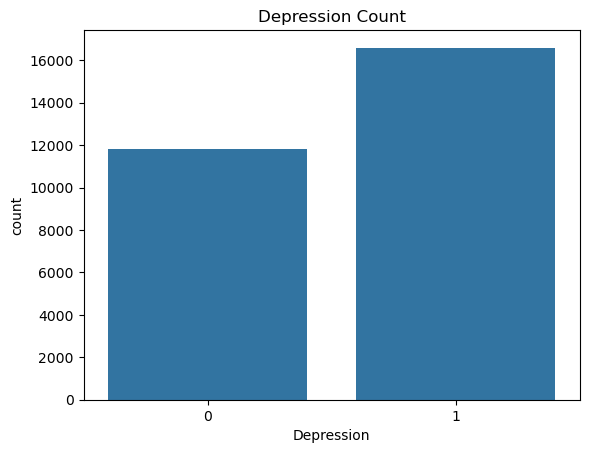

In [9]:
sns.countplot(data=df, x='Depression')
plt.title('Depression Count')
plt.show()

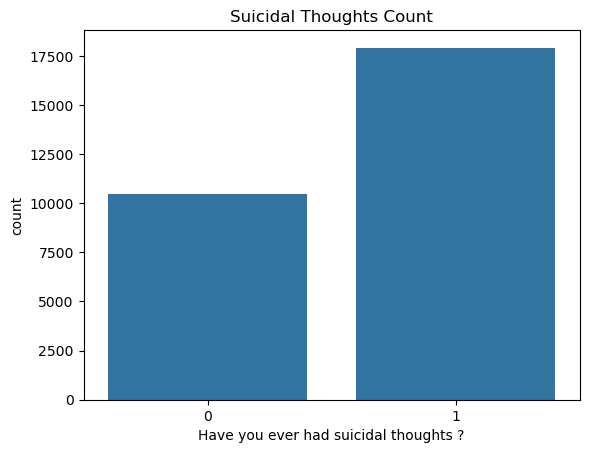

In [10]:
sns.countplot(data=df, x='Have you ever had suicidal thoughts ?')
plt.title('Suicidal Thoughts Count')
plt.show()

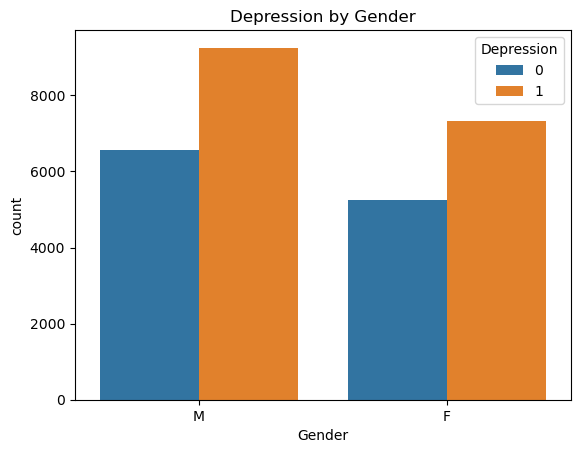

In [11]:
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title('Depression by Gender')
plt.show()


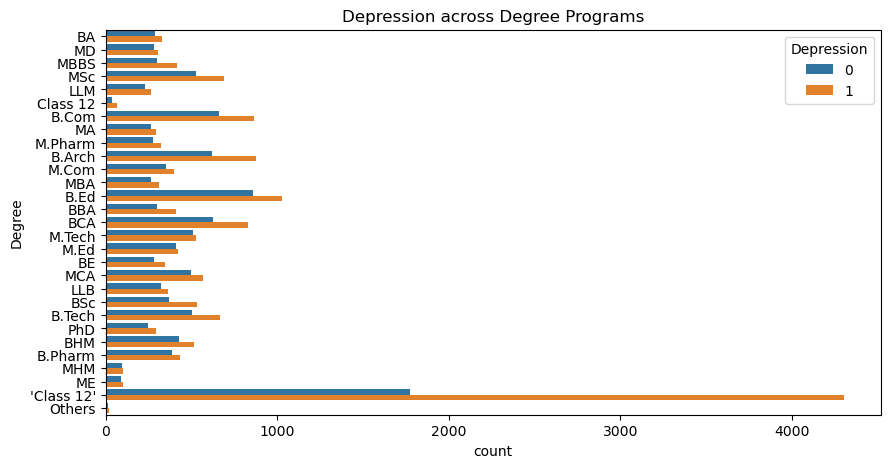

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Degree', hue='Depression')
plt.title('Depression across Degree Programs')
plt.show()


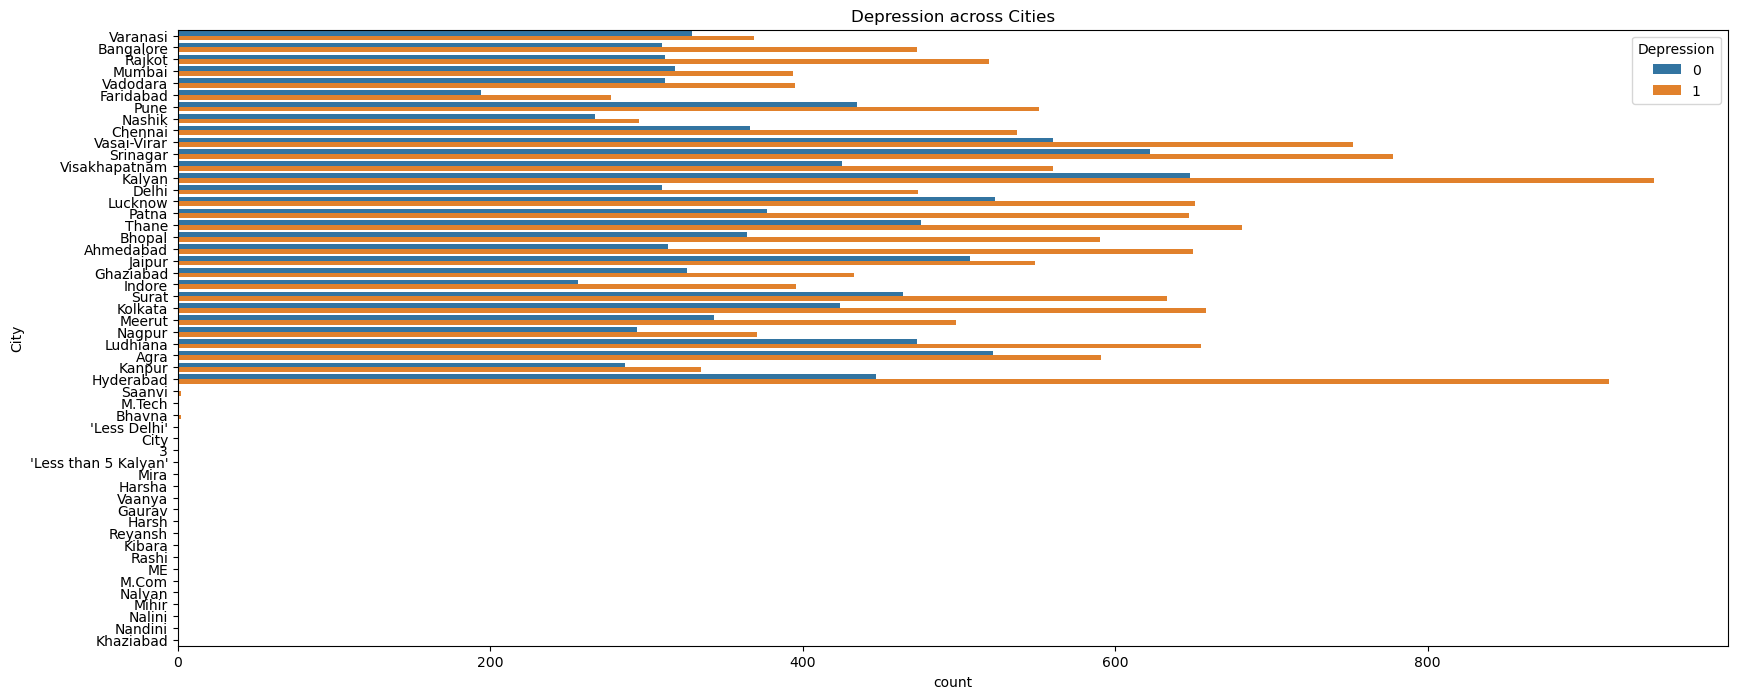

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(data=df, y='City', hue='Depression')
plt.title('Depression across Cities')
plt.show()


In [14]:
import pandas as pd
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()
cf.set_config_file(world_readable=True, theme='pearl')  # other: solar, white, dark

# Assuming your DataFrame is already cleaned and ready


In [15]:
# Group by City and Depression status (0/1), and count
grouped = df.groupby(['City', 'Depression']).size().unstack(fill_value=0)


In [16]:
grouped.iplot(
    kind='bar',
    barmode='stack',  # or 'group'
    orientation='h',
    title='🧠 Depression across Cities (Interactive)',
    xTitle='Number of Students',
    yTitle='City',
    colors=['#636EFA', '#EF553B'],  # Custom colors for 0 and 1
    width=0.8,
    theme='pearl'
)


In [17]:
df.groupby(['Gender', 'Depression']).size().unstack().iplot(kind='bar', barmode='group' , colors=["#0FD113", "#FF2600"])


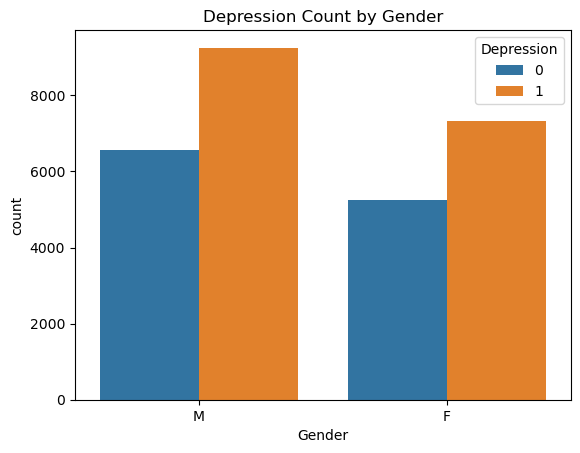

In [18]:
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title("Depression Count by Gender")
plt.show()


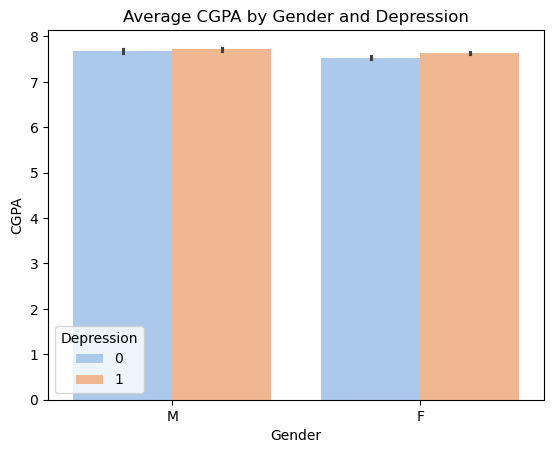

In [19]:
sns.barplot(data=df, x='Gender', y='CGPA', hue='Depression', palette='pastel')
plt.title("Average CGPA by Gender and Depression")
plt.show()


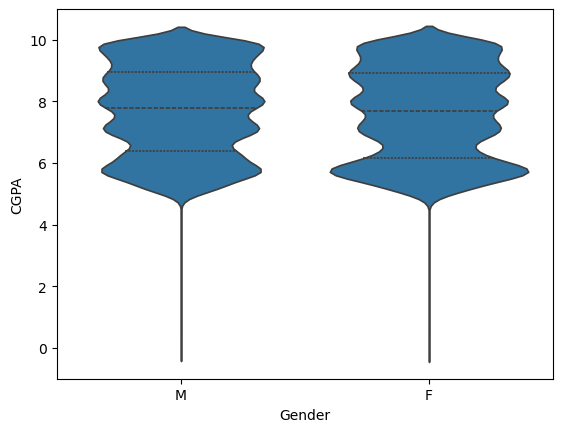

In [20]:
sns.violinplot(data=df, x='Gender', y='CGPA', inner="quartile")
plt.show()

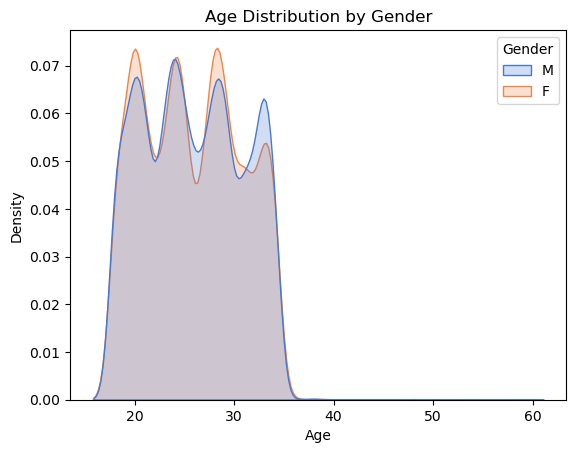

In [21]:
# ...existing code...

sns.kdeplot(data=df, x='Age', hue='Gender', fill=True, common_norm=False, palette='muted')
plt.title('Age Distribution by Gender')
plt.show()
# ...existing code...

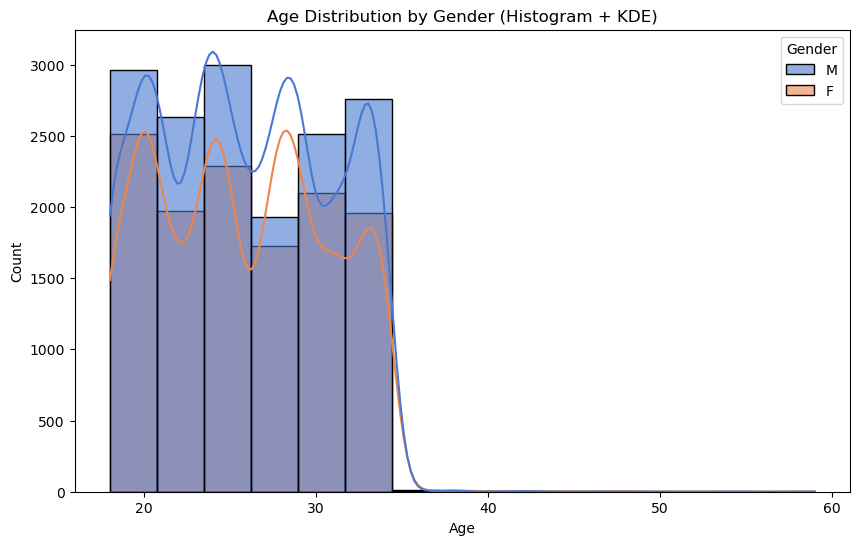

In [22]:
# ...existing code...

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Gender', bins=15, kde=True, palette='muted', alpha=0.6)
plt.title('Age Distribution by Gender (Histogram + KDE)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# ...existing code...

In [23]:
# ...existing code...

import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()
cf.set_config_file(world_readable=True, theme='pearl')

# Group ages by gender and count
age_gender_counts = df.groupby(['Age', 'Gender']).size().reset_index(name='Count')

# Pivot for plotting
pivot_df = age_gender_counts.pivot(index='Age', columns='Gender', values='Count').fillna(0)

# Interactive bar plot
pivot_df.iplot(
    kind='bar',
    barmode='group',
    title='Interactive Age Distribution by Gender',
    xTitle='Age',
    yTitle='Number of Students',
    colors=['#636EFA', '#EF553B', '#00CC96'],  # Add more colors if you have more genders
    theme='pearl'
)
# ...existing code...

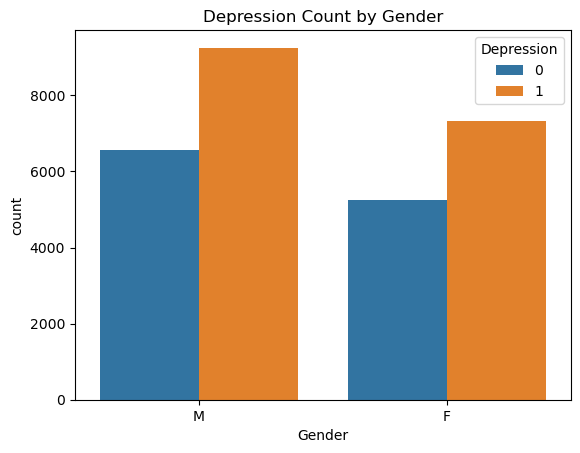

In [24]:
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title("Depression Count by Gender")
plt.show()


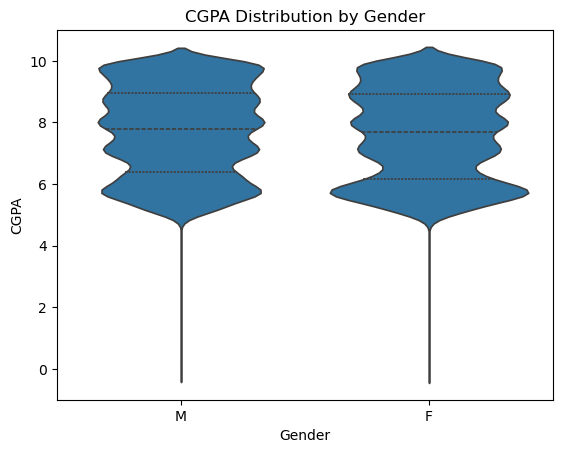

In [25]:
sns.violinplot(data=df, x='Gender', y='CGPA', inner='quartile')
plt.title("CGPA Distribution by Gender")
plt.show()


EDA BEGINS

In [63]:
df = pd.read_excel(r'datasets\Ready_Dataset.xlsx')

In [27]:
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

C:\Users\danis\AppData\Local\Temp\ipykernel_14832\2415338861.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




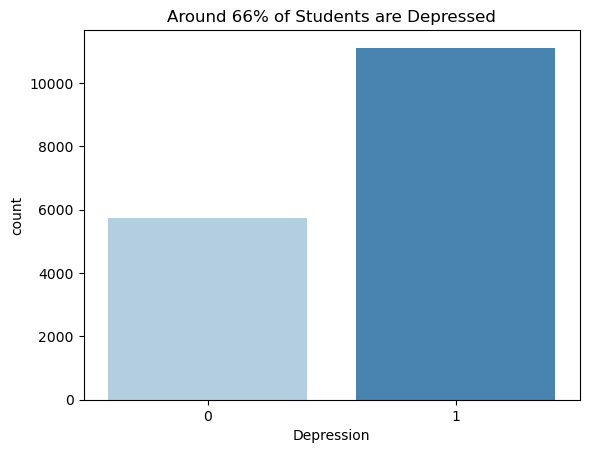

In [41]:
# ...existing code...

depressed_percent = df['Depression'].value_counts(normalize=True)[1] * 100
sns.countplot(data=df, x='Depression', palette='Blues')
plt.title(f'Around {depressed_percent:.0f}% of Students are Depressed')
plt.show()
# ...existing code...

C:\Users\danis\AppData\Local\Temp\ipykernel_14832\1982586122.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




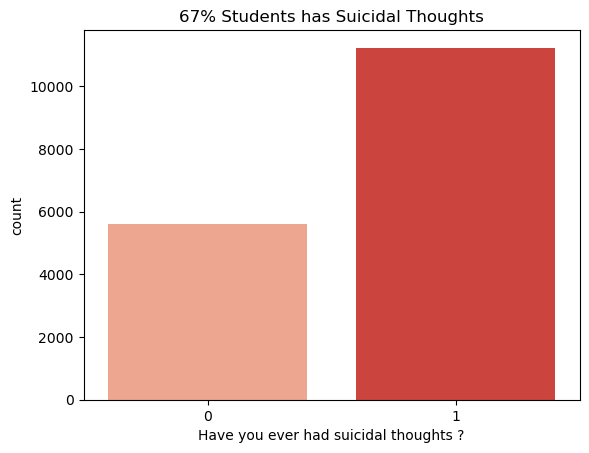

In [43]:
suicidal_percentage = df['Have you ever had suicidal thoughts ?'].value_counts(normalize=True) * 100
sns.countplot(data=df, x='Have you ever had suicidal thoughts ?', palette='Reds')
plt.title(f'{suicidal_percentage[1]:.0f}% Students has Suicidal Thoughts')
plt.show()

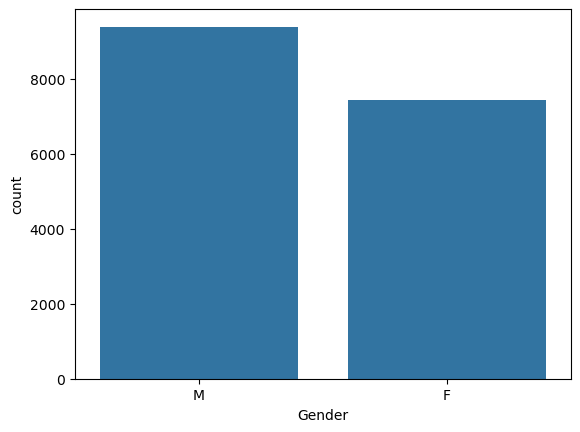

In [49]:
sns.countplot(data=df, x = "Gender")
plt.show()

C:\Users\danis\AppData\Local\Temp\ipykernel_14832\2479766135.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




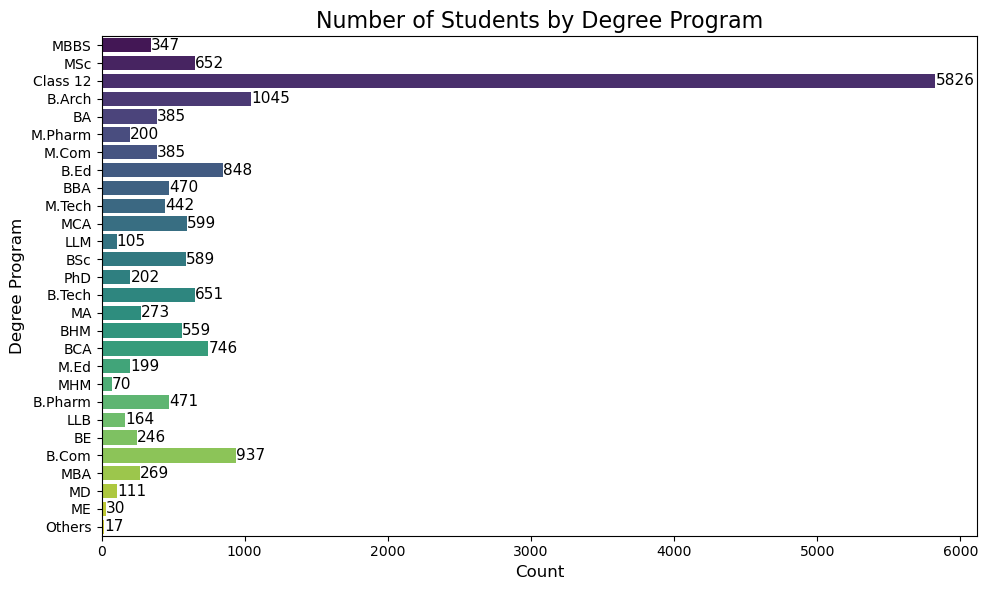

In [77]:
# ...existing code...

plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, y='Degree', palette='viridis')
plt.title('Number of Students by Degree Program', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Degree Program', fontsize=12)

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                va='center', ha='left', fontsize=11, color='black')

plt.tight_layout()
plt.show()
# ...existing code...

C:\Users\danis\AppData\Local\Temp\ipykernel_14832\473424489.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




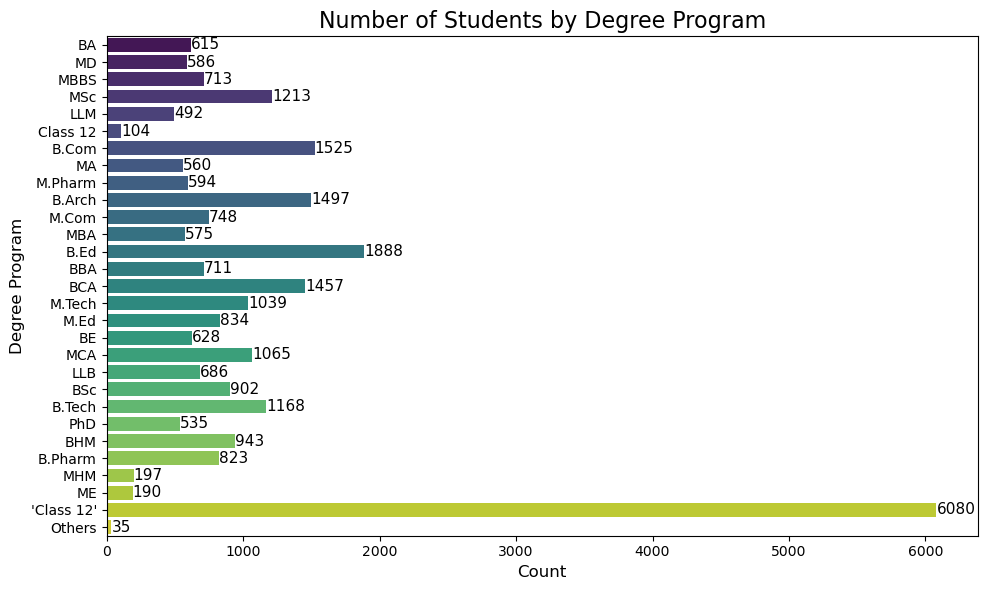

In [59]:
# ...existing code...
df = pd.read_excel(r'datasets\combined_students_data.xlsx')  
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, y='Degree', palette='viridis')
plt.title('Number of Students by Degree Program', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Degree Program', fontsize=12)

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                va='center', ha='left', fontsize=11, color='black')

plt.tight_layout()
plt.show()
# ...existing code...

In [61]:
df.groupby('Degree')['Depression'].value_counts(normalize=True).unstack().iplot(
    kind='bar')

In [96]:
df = pd.read_excel(r'datasets\Ready_Dataset.xlsx')

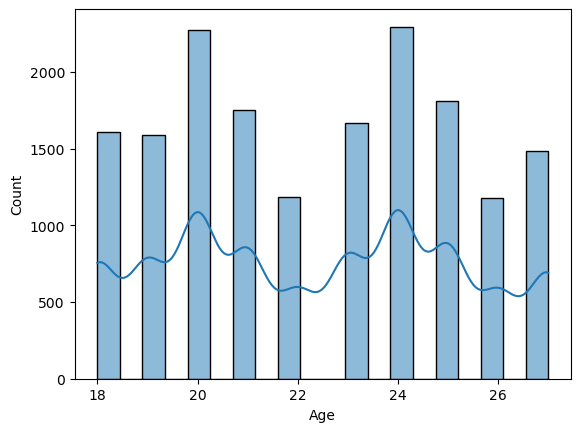

In [71]:

sns.histplot(data=df, x = 'Age' ,kde=True, bins=20)
plt.show()

C:\Users\danis\AppData\Local\Temp\ipykernel_14832\545611317.py:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



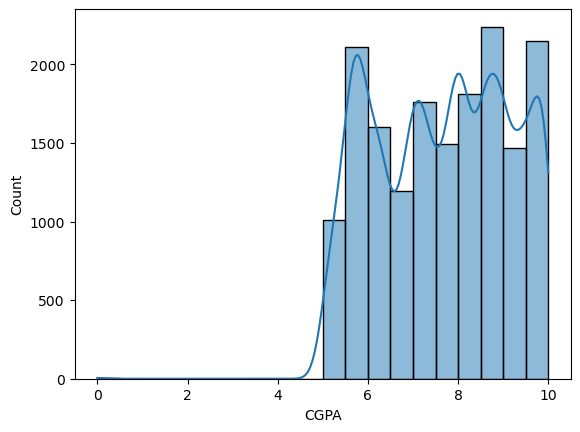

In [72]:
sns.histplot(data=df, x = 'CGPA' ,kde=True, bins=20, palette='viridis')
plt.show()

C:\Users\danis\AppData\Local\Temp\ipykernel_14832\3545160657.py:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



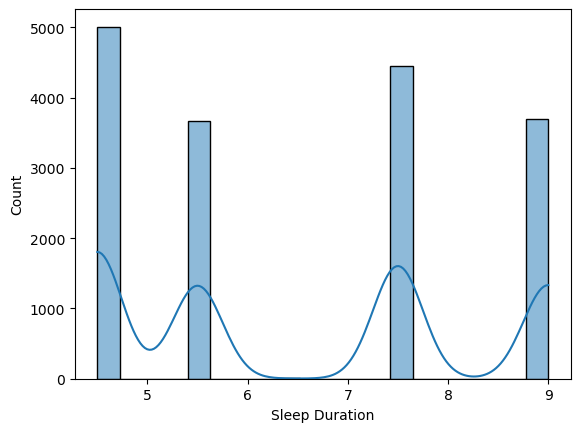

In [73]:
sns.histplot(data=df, x = 'Sleep Duration' ,kde=True, bins=20, palette='viridis')
plt.show()

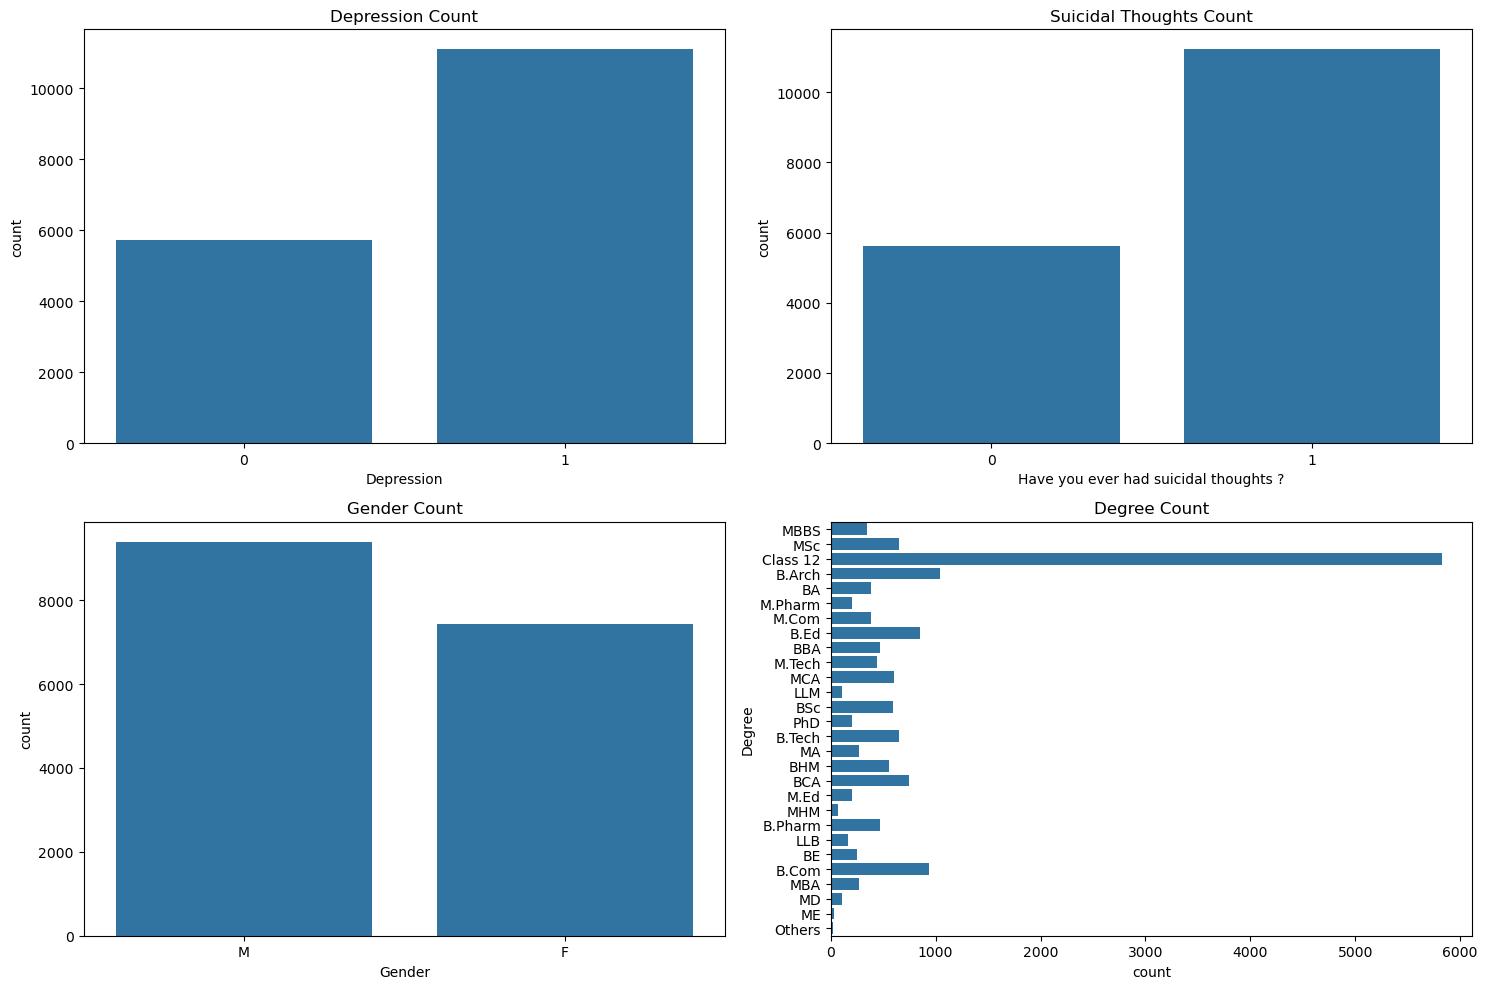

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

sns.countplot(data=df, x='Depression', ax=axes[0,0])
axes[0,0].set_title('Depression Count')

sns.countplot(data=df, x='Have you ever had suicidal thoughts ?', ax=axes[0,1])
axes[0,1].set_title('Suicidal Thoughts Count')

sns.countplot(data=df, x='Gender', ax=axes[1,0])
axes[1,0].set_title('Gender Count')

sns.countplot(data=df, y='Degree', ax=axes[1,1])
axes[1,1].set_title('Degree Count')

plt.tight_layout()
plt.show()


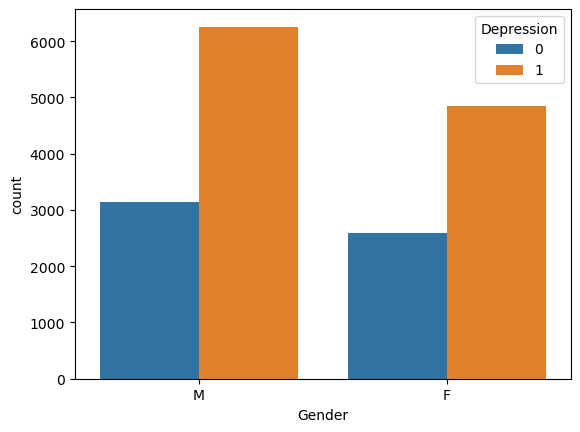

In [ ]:
sns.countplot(data=df, x='Gender', hue='Depression')
plt.show()

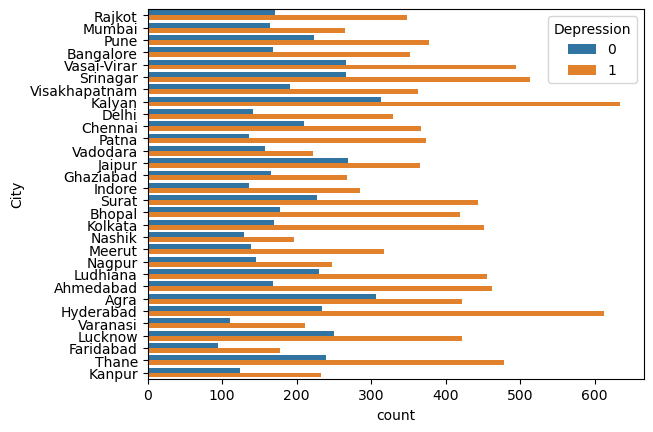

In [80]:
sns.countplot(data=df, y="City", hue='Depression')
plt.show()

In [81]:
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,M,25,Rajkot,1,7.21,3,5.5,0,MBBS,1,10,4,0,1
1,M,23,Mumbai,1,9.90,4,9.0,0,MSc,1,7,2,1,0
2,M,19,Rajkot,4,9.05,4,5.5,0,Class 12,1,1,4,1,1
3,F,20,Pune,4,6.17,1,9.0,2,Class 12,1,3,4,1,1
4,M,24,Bangalore,2,9.79,1,7.5,0,B.Arch,1,11,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16833,M,23,Srinagar,3,6.00,2,9.0,2,MBBS,1,12,4,0,0
16834,F,27,Surat,5,5.75,5,5.5,0,Class 12,1,7,1,1,0
16835,M,27,Ludhiana,2,9.40,3,4.5,2,MSc,0,0,3,1,0
16836,F,18,Ludhiana,5,6.88,2,4.5,2,Class 12,1,10,5,0,1


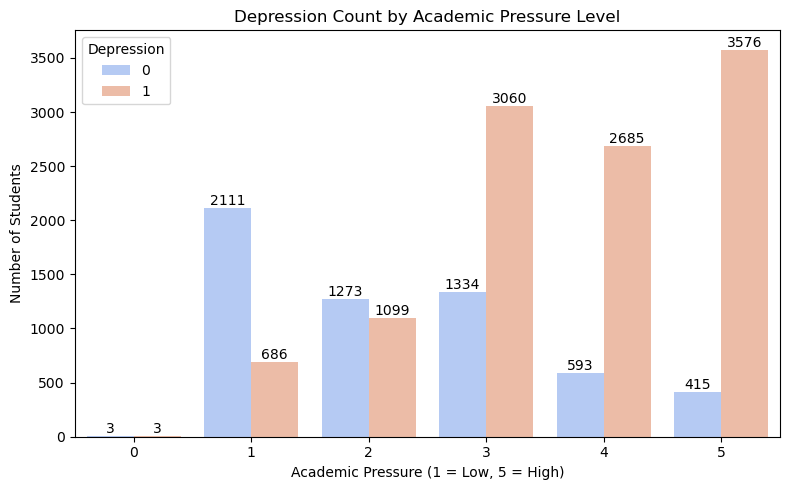

In [82]:
# ...existing code...

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Academic Pressure', hue='Depression', palette='coolwarm')
plt.title('Depression Count by Academic Pressure Level')
plt.xlabel('Academic Pressure (1 = Low, 5 = High)')
plt.ylabel('Number of Students')

# Add count labels to each bar
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()
# ...existing code...

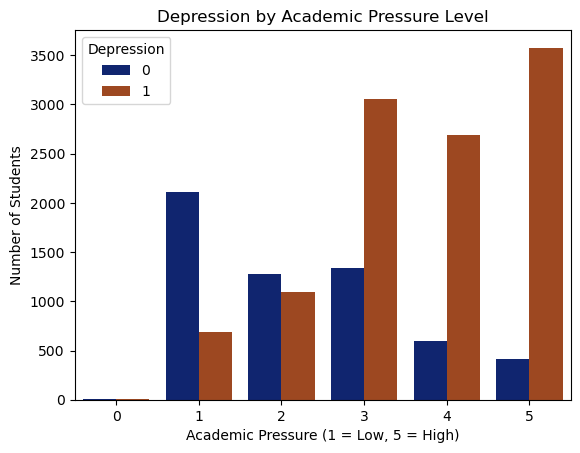

In [87]:
# ...existing code...

sns.countplot(data=df, x='Academic Pressure', hue='Depression' , palette='dark')
plt.title('Depression by Academic Pressure Level')
plt.xlabel('Academic Pressure (1 = Low, 5 = High)')
plt.ylabel('Number of Students')
plt.show()
# ...existing

In [88]:
df.head(2)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,M,25,Rajkot,1,7.21,3,5.5,0,MBBS,1,10,4,0,1
1,M,23,Mumbai,1,9.90,4,9.0,0,MSc,1,7,2,1,0


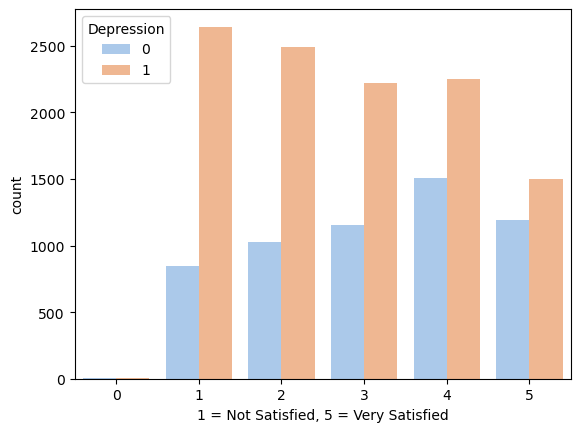

In [90]:
sns.countplot(data=df, x='Study Satisfaction', hue='Depression' , palette='pastel')
plt.xlabel("1 = Not Satisfied, 5 = Very Satisfied")
plt.show()

C:\Users\danis\AppData\Local\Temp\ipykernel_14832\3073533656.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



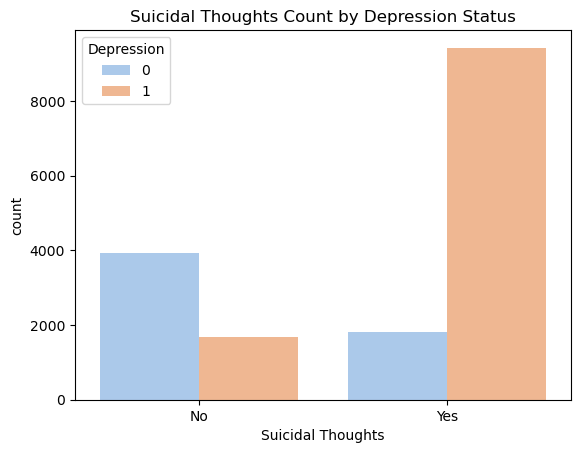

In [97]:
# ...existing code...

ax = sns.countplot(data=df, x="Have you ever had suicidal thoughts ?", hue='Depression', palette='pastel')
plt.title('Suicidal Thoughts Count by Depression Status')
plt.xlabel('Suicidal Thoughts')
ax.set_xticklabels(['No', 'Yes'])
plt.show()
# ...existing code...

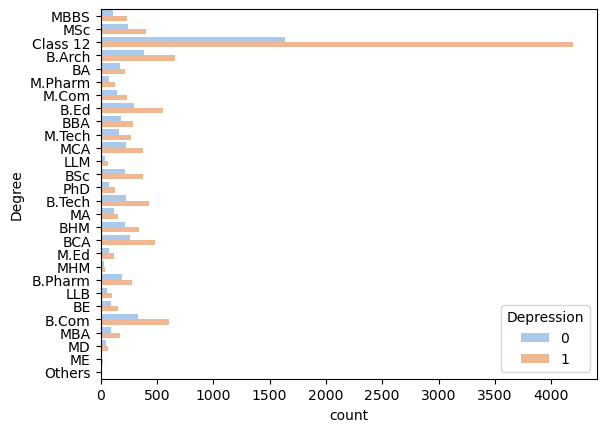

In [99]:
sns.countplot(data=df, y="Degree" , hue='Depression', palette='pastel')
plt.show()

In [100]:
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,M,25,Rajkot,1,7.21,3,5.5,0,MBBS,1,10,4,0,1
1,M,23,Mumbai,1,9.90,4,9.0,0,MSc,1,7,2,1,0
2,M,19,Rajkot,4,9.05,4,5.5,0,Class 12,1,1,4,1,1
3,F,20,Pune,4,6.17,1,9.0,2,Class 12,1,3,4,1,1
4,M,24,Bangalore,2,9.79,1,7.5,0,B.Arch,1,11,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16833,M,23,Srinagar,3,6.00,2,9.0,2,MBBS,1,12,4,0,0
16834,F,27,Surat,5,5.75,5,5.5,0,Class 12,1,7,1,1,0
16835,M,27,Ludhiana,2,9.40,3,4.5,2,MSc,0,0,3,1,0
16836,F,18,Ludhiana,5,6.88,2,4.5,2,Class 12,1,10,5,0,1


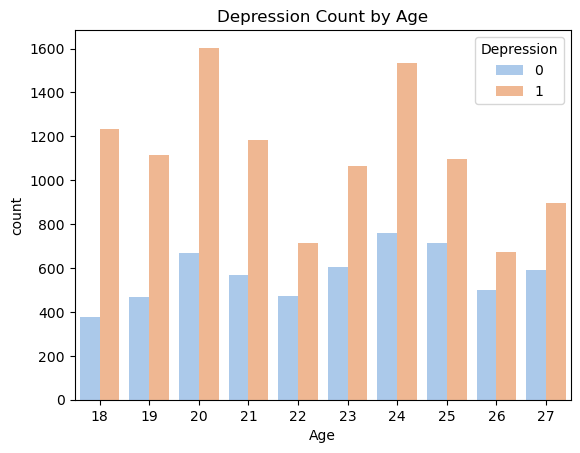

In [101]:
sns.countplot(data=df, x='Age', hue='Depression', palette='pastel')
plt.title('Depression Count by Age')
plt.show()

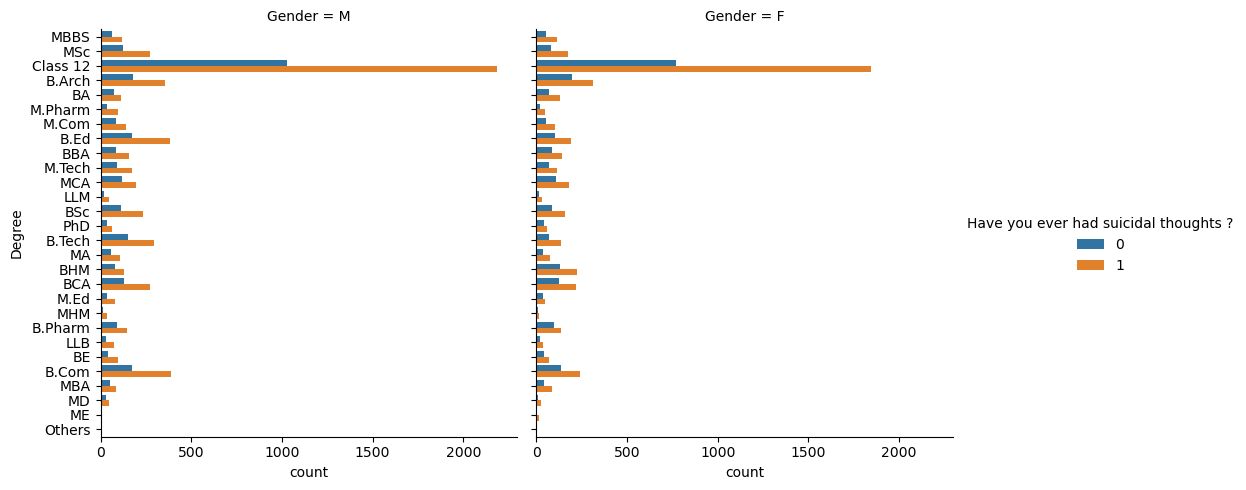

In [105]:
sns.catplot(kind='count', col='Gender', hue='Have you ever had suicidal thoughts ?', data=df, y='Degree')

In [106]:
# ...existing code...

# Group by Degree, Gender, and Suicidal Thoughts, then count
grouped = df.groupby(['Degree', 'Gender', 'Have you ever had suicidal thoughts ?']).size().unstack(fill_value=0)

# Interactive bar plot with cufflinks
grouped.iplot(
    kind='bar',
    barmode='group',
    title='Suicidal Thoughts by Degree and Gender',
    xTitle='Degree',
    yTitle='Number of Students',
    colors=['#636EFA', '#EF553B'],  # Customize colors for 0/1
    theme='pearl'
)
# ...existing code...

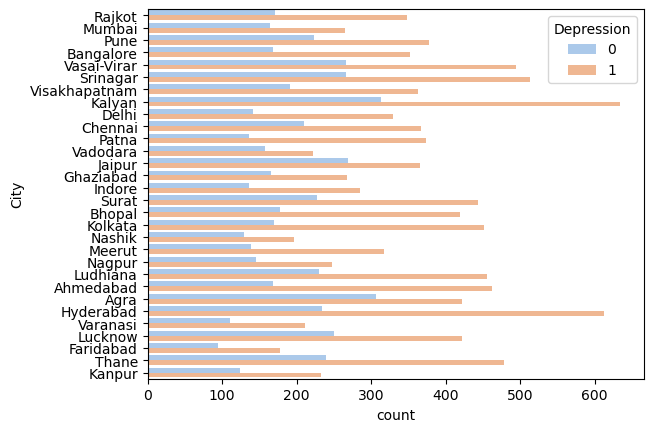

In [108]:
sns.countplot(data=df, y='City' , hue='Depression', palette='pastel')
plt.show()